# Pra UAS

# Pendahuluan

# Data Understanding

## Sumber Data

Dataset diambil dari link dibawah ini:

https://archive.ics.uci.edu/dataset/19/car+evaluation

Database Evaluasi Mobil berasal dari model keputusan hierarkis sederhana yang awalnya dikembangkan untuk demonstrasi DEX, M. Bohanec, V. Rajkovic: Sistem pakar untuk pengambilan keputusan. Sistemica 1(1), hlm. 145-157, 1990.).

## Tujuan

Dataset ini digunakan untuk membantu dalam mengevaluasi Mobil.

## Integrasi Data

In [1]:
pip install ucimlrepo


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
car_evaluation = fetch_ucirepo(id=19)

# data (as pandas dataframes)
X = car_evaluation.data.features
y = car_evaluation.data.targets

data = car_evaluation.data.original
data.to_csv("data_car.csv", index=True)

# metadata
print(car_evaluation.metadata)

# variable information
print(car_evaluation.variables)


{'uci_id': 19, 'name': 'Car Evaluation', 'repository_url': 'https://archive.ics.uci.edu/dataset/19/car+evaluation', 'data_url': 'https://archive.ics.uci.edu/static/public/19/data.csv', 'abstract': 'Derived from simple hierarchical decision model, this database may be useful for testing constructive induction and structure discovery methods.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1728, 'num_features': 6, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1988, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5JP48', 'creators': ['Marko Bohanec'], 'intro_paper': {'ID': 249, 'type': 'NATIVE', 'title': 'Knowledge acquisition and explanation for multi-attribute decision making', 'authors': 'M. Bohanec, V. Rajkovič', 'venue': '8th Intl Workshop on Expert Systems and their Applications, 

# Eksplorasi Data

## Data Asli

In [3]:
display(data)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


## Data Numerik (Encode)

In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
# Apply LabelEncoder to each column in the 'data' DataFrame
for col in data.columns:
    data[col] = le.fit_transform(data[col])

display(data)

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


## Visualisasi Data

/tmp/ipykernel_9379/2972389909.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=data, palette='viridis')


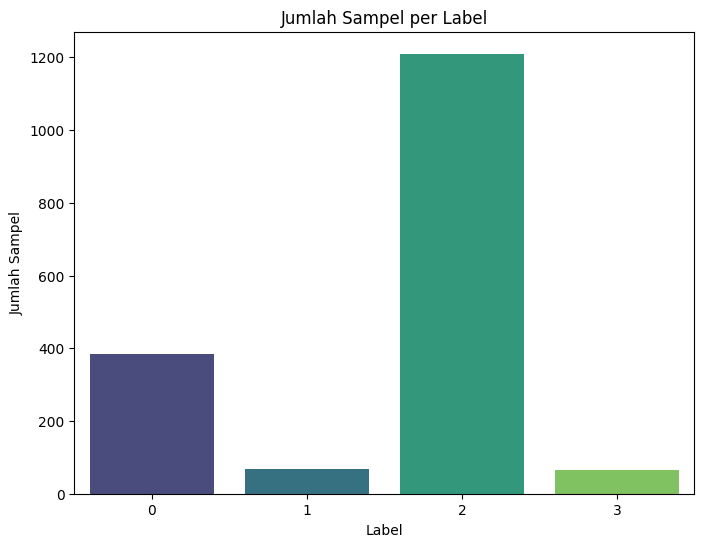

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=data, palette='viridis')
plt.title('Jumlah Sampel per Label')
plt.xlabel('Label')
plt.ylabel('Jumlah Sampel')
plt.show()

<Figure size 1200x1000 with 0 Axes>

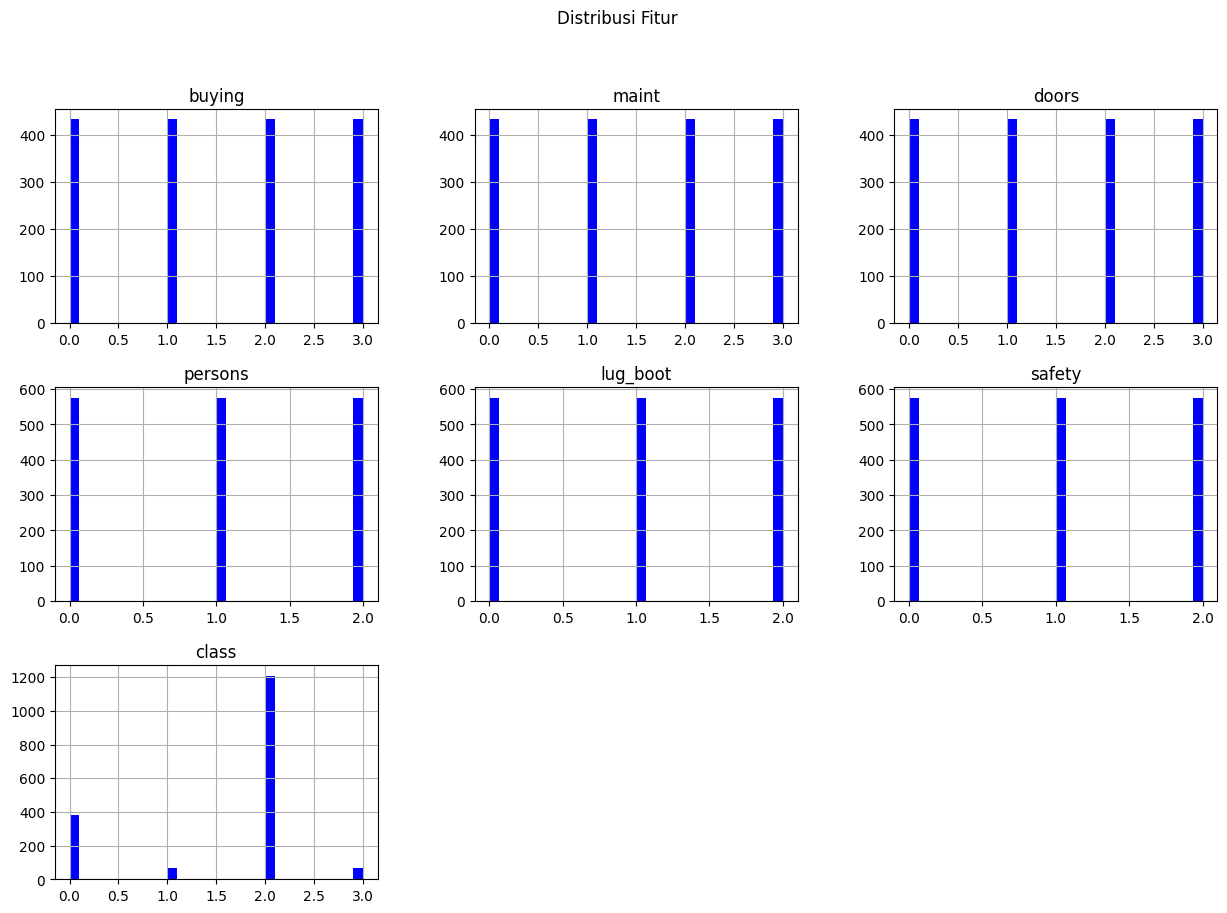

In [6]:
# Visualisasi distribusi fitur dengan histogram
plt.figure(figsize=(12, 10))
data.hist(bins=30, figsize=(15, 10), color='blue')
plt.suptitle('Distribusi Fitur')
plt.show()

# Struktur Dataset

## Fitur dan Label

In [ ]:
data.shape #untuk mengetahui bentuk dataset(baris & kolom)

Terdapat 1728 baris dan 7 kolom

In [ ]:
data.columns #untuk mengetahui kolom-kolom yang ada pada dataset

Fitur adalah atribut atau variabel independen dalam dataset yang digunakan untuk membuat prediksi.

Terdapat 6 fitur pada dataset ini:


* Buying: Berisi informasi harga dari mobil pada dataset
* Maint: Berisi informasi biaya pemeliharan dari mobil yang ada pada dataset
* Doors: Berisi informasi jumlah pintu dari mobil yang ada pada dataset
* Persons: Berisi informasi jumlah kapasitas yang muat dalam satu data mobil dari dataset
* Lug_boot: Berisi informasi dari kapasitas dari bagasi mobil yang ada pada dataset
* Safety: Berisi informasi keamanan dari mobil yang ada pada dataset

Label adalah variabel dependen atau target yang ingin diprediksi oleh model machine learning. Label merupakan output yang dipelajari oleh model dari data.

Terdapat 1 field label dengan 4 tipe pada dataset ini:

acc(dapat diterima) dilambangkan dengan angka 0.

good(bagus) dilambangkan dengan angka 1.

unacc(tidak dapat diterima) dilambangkan dengan angka 2.

vgood(sangat bagus) dilambangkan dengan angka 3.


In [ ]:
data.dtypes #untuk mengetahui tipe data dari masing-masing kolom

Lebih Jelas:

**Buying**

Berisi informasi harga dari mobil.
*   0 = high/tinggi
*   1 = low/rendah
*   2 = med/sedang
*   3 = vhigh/sangat tinggi

**Maint**

Berisi informasi biaya pemeliharan dari mobil.
*   0 = high/tinggi
*   1 = low/rendah
*   2 = med/sedang
*   3 = vhigh/sangat tinggi

**Doors**

Berisi informasi jumlah pintu dari mobil.
*   0 = 2 (pintu)
*   1 = 3 (pintu)
*   2 = 4 (pintu)
*   3 = 5 more (pintu)

**Persons**

Berisi informasi jumlah kapasitas yang muat dalam satu mobil.
*   0 = 2 (orang)
*   1 = 4 (orang)
*   2 = >4 (orang)

**Lug_boot**

Berisi informasi dari kapasitas dari bagasi mobil.
*   0 = big (besar)
*   1 = med (sedang)
*   2 = small (kecil)

**Safety**

Berisi informasi keamanan dari mobil.
*   0 = high (tinggi)
*   1 = low (rendah)
*   2 = med (sedang)

**Class**

Berisi informasi mobil termasuk kategori kelas mana.
*   0 = acc (dapat diterima)
*   1 = good (bagus)
*   2 = unacc (tidak dapat diterima)
*   3 = vgood (sangat bagus)

In [ ]:
data.groupby('class').size() #untuk mengetahui jumlah masing-masing class

# **Identifikasi Kualitas Dataset**

## Deteksi Missing Value

Missing value merupakan data yang hilang pada suatu dataset. Hal ini bisa terjadi oleh beberapa faktor, diantaranya adalah :

* Interviewer recording error terjadi akibat kelalaian petugas pengumpul data (pewawancara), misalnya ada sejumlah pertanyaan yang terlewatkan.

* Respondent inability error terjadi akibat ketidakmampuan responden dalam memberikan jawaban akurat, misalnya karena tidak memahami pertanyaan, bosan atau kelelahan (respondent fatigue) akhirnya responden mengosongkan sejumlah pertanyaan atau berhenti mengisi kuesioner di tengah jalan.

* Unwillingness respondent error terjadi karena responden tidak berkenan memberikan jawaban yang akurat, misalnya pertanyaan soal penghasilan, usia, berat badan, pengalaman melakukan pelanggaran hukum, dll.

Cara penanganan Missing Values :

* Mengabaikan dan membuang missing data.

* Estimasi parameter.

* Imputasi.

Dalam modul kali ini saya akan menangani missing values menggunakan metode imputasi, yang ada 2 metode yaitu menggunakan metode Mean dan menggunakan metode KNN.

pada kolom di bawah ini akan dilakukan pendeteksian missing values terlebih dahulu pada masing-masing kolom.

In [ ]:
import pandas as pd

# Detect rows with missing values
rows_with_missing = data[data.isnull().any(axis=1)]

# Tampilkan baris dengan nilai yang hilang beserta ID, fitur, dan labelnya
print("Rows with Missing Values:")
print(rows_with_missing)

# Detect missing values
missing_values = data.isnull()

# Hitung nilai yang hilang di setiap kolom
missing_counts = missing_values.sum()

# Display missing value counts
print("Missing Value Counts:")
print(missing_counts)

Berdasarkan proses pengecekan missing value di atas, didapatkan hasil seperti berikut:

* Fitur Buying memiliki 0 missing value.

* Fitur Maints memiliki 0 missing value.

* Fitur Doors memiliki 0 missing value.

* Fitur Persons memiliki 0 missing value.

* Fitur Lug_boot memiliki 0 missing value.

* Fitur Safety memiliki 0 missing value.

# **Preprocessing Data**

## Imputasi Missing Value

### Mean

setelah missing value terdeteksi, kita perlu untuk mengisi data yang kosong dengan data yang pas agar data dapat digunakan, ada banyak cara untuk mengisi missing value antara lain yaitu dengan menggunkan metode mean,pada tahap ini kita akan melakukan imputasi dengan metode mean.

Untuk langkah-langkah nya sebagai berikut:

* hitung rata rata setiap kolom pada ‘data’ lalu simpan hasilnya di suatu variable disini saya mendefinisikan ‘mean_values’

* gunakan metode dari pandas untuk mengisikan/mengantikan value yang kosong/hilang pada dataFrame. saya disini untuk mengisi value yang kosong dengan menjumlahkan rata-rata dari setiap kolom.

In [ ]:
mean_values = data.mean()
data_filled = data.fillna(mean_values)

print("ini hasil perhitungan mean menggunakan (fillna)")
print(mean_values)
print("")

print("input tiap kolom missing dengan mean")
print("jika output false berarti sudah tidak ada missing value")
print(data_filled.isnull())
print("")
print("")

print("melihat secara tiap karakter")
print(data_filled.isnull().any())
print("")
print("")

missing_values = data_filled.isnull()

# Count missing values in each column
missing_counts = missing_values.sum()

# Display missing value counts
print("Jumlah Missing Value:")
print(missing_counts) #melihat missing value (jika ada) pada semua fitur

*** KNN
Pada tahapan ini kami akan melakukan imputasi missing value dengan metode KNN dengan perhitungan jarak menggunakan rumus euclidien distance.

Langkah-langkah KNN :

* Tentukan jumlah tetangga (K) yang akan digunakan untuk pertimbangan penentuan kelas (metode cross validation)

* Hitung jarak dari data baru ke masing-masing data point di dataset (eulidien distance).

* Ambil tetangga terdekat menurut K, kemudian hitung rata-ratanya.

Sedangkan untuk mencari nilai K terbaik kami menggunakan Cross validation.

K-Fold Cross Validation atau lebih sering disebut cross validation adalah salah satu teknik yang populer dipakai dalam evaluasi model ML. Pada cross validation dataset dibagi sebanyak K lipatan. Pada setiap iterasi setiap lipatan akan dipakai satu kali sebagai data uji dan lipatan sisanya dipakai sebagai data latih. Dengan menggunakan cross validation kita akan memperoleh hasil evaluasi yang lebih akurat karena model dievaluasi dengan seluruh data.

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Memisahkan fitur dan label
feature_columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']
X = data[feature_columns].values # Use the label-encoded 'data' DataFrame
y = data['class'].values # Use the label-encoded 'data' DataFrame

# Mengubah label menjadi numerik
le = LabelEncoder()
y = le.fit_transform(y)


# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Membuat list k untuk KNN
k_list = list(range(1, 50, 2))
print(f"Nilai K yang akan diuji = {k_list}")
cv_scores = []

# Melakukan 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Menghitung MSE
MSE = [1 - x for x in cv_scores]

plt.figure(figsize=(15, 10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)
plt.show()

# Menemukan nilai k terbaik
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

Setelah didapati jumlah K terbaik, maka kita coba cek akurasinya.

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=5)

# Melatih model
classifier.fit(X_train, y_train)

# Memprediksi data uji
y_pred = classifier.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred) * 100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

setelah didapati akurasi model apabila K berjumlah 5 mendapat hasil 90,46%. maka model tersebut dikatakan baik karena berada di atas 85%. langkah selanjutnya adalah melakukan imputasi dengan KNN.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer

# Inisialisasi KNNImputer
imputer = KNNImputer(n_neighbors=9, metric='nan_euclidean')

# Lakukan imputasi pada data yang memiliki nilai yang hilang
data_imputed = imputer.fit_transform(data)

# Konversi hasil imputasi menjadi DataFrame
data_imputed_df = pd.DataFrame(data_imputed, columns=data.columns)

# Detect missing values
missing_values = data_imputed_df.isnull()

# Count missing values in each column
missing_counts = missing_values.sum()

# Display missing value counts
print("---------------------------Missing Value Counts---------------------------".center(100))
print(missing_counts)

print()
print("---------------------------Hasil data yang sudah diimputasi---------------------------")
# List dari indeks yang ingin ditampilkan
indeks_tampilkan = [23, 40, 139, 145, 158, 164, 235, 249, 275, 292, 294, 297, 315, 321, 411, 617]

# Tampilkan data pada indeks yang diberikan
data_tampil = data_imputed_df.iloc[indeks_tampilkan]
print(data_tampil)

# Pendeteksian Outlier

Outlier/pencilan merupakan data pada dataset yang menyimpang dari data lainnya,mendeteksi outlier perlu agar data yang diolah memberikan hasil yang baik pada model yang akan dibuat nantinya. Outlier dapat diidentifikasi dan ditangani dengan beberapa cara antara lain yang akan kami gunakan yaitu LOF(Local Outlier Factor).

## Konsep Local Outlier Factor

Outlier adalah titik data yang berbeda atau jauh dari titik data lainnya. Local Outlier Factor (LOF) adalah algoritma yang mengidentifikasi outlier yang ada dalam kumpulan data. Ketika suatu titik dianggap sebagai outlier berdasarkan lingkungan lokalnya, maka titik tersebut disebut local outlier. LOF akan mengidentifikasi outlier dengan mempertimbangkan kepadatan lingkungan. LOF bekerja dengan baik ketika kepadatan data tidak sama di seluruh kumpulan data.

Untuk memahami LOF, ada beberapa konsep yang harus dipelajari secara berurutan:

* K-distance dan K-neighbors

* Reachability Distance (RD)

* Local Reachability Density (LRD)

* Local Outlier Factor (LOF)

**K-distance** adalah jarak antara suatu titik, dan merupakan tetangga terdekat Kᵗʰ. Tetangga K yang dilambangkan dengan Nₖ(A) mencakup himpunan titik yang terletak di dalam atau pada lingkaran berjari-jari jarak K. K-tetangga bisa lebih dari atau sama dengan nilai K. Kita akan melihat contohnya. Katakanlah kita mempunyai empat titik A, B, C, dan D. Jika K=2, K-tetangga A adalah C, B, dan D. Di sini, nilai K=2 tetapi ||N₂(A)|| = 3. Oleh karena itu, ||Nₖ(titik)|| akan selalu lebih besar atau sama dengan K.

**Reachability Distance (RD)** Ini didefinisikan sebagai jarak K maksimum Xj dan jarak antara Xi dan Xj. Ukuran jarak bersifat khusus untuk masalah (Euclidean, Manhattan, dll.) Dalam istilah awam, jika titik Xi terletak di dalam K-tetangga Xj, maka jarak jangkauannya adalah K-jarak Xj (garis biru), jika tidak, jarak jangkauannya adalah jarak antara Xi dan Xj (garis oranye).

**Local reachability density (LRD)** merupakan kebalikan dari rata-rata jarak jangkauan A dari tetangganya. Semakin besar jarak jangkauan rata-rata (yaitu, tetangga jauh dari titik tersebut), semakin sedikit kepadatan titik yang ada di sekitar titik tertentu. Ini menunjukkan seberapa jauh suatu titik dari kelompok titik terdekat. Nilai LRD yang rendah menunjukkan bahwa cluster terdekat berada jauh dari titik.

**Local Outlier Factor (LOF)** LRD tiap titik digunakan untuk membandingkan dengan rata-rata LRD K tetangganya. LOF adalah perbandingan rata-rata LRD K tetangga A terhadap LRD A. Jika suatu titik bukan merupakan pencilan (inlier), rasio rata-rata LRD tetangganya kira-kira sama dengan LRD suatu titik (karena kepadatan suatu titik dan tetangganya kira-kira sama). Dalam hal ini, LOF hampir sama dengan 1. Sebaliknya, jika suatu titik merupakan outlier, LRD suatu titik lebih kecil dari rata-rata LRD tetangganya. Maka nilai LOF akan tinggi. Umumnya jika LOF > 1 maka dianggap outlier, namun hal tersebut tidak selalu benar. Katakanlah kita mengetahui bahwa kita hanya memiliki satu outlier dalam data, lalu kita ambil nilai LOF maksimum di antara semua nilai LOF, dan titik yang sesuai dengan nilai LOF maksimum akan dianggap sebagai outlier.

Untuk langkah-langkah perhitungan manual Local Outlier Factor (LOF) yaitu :

* Menghitung jarak dan menentukan tetangga

* Menghitung Reachability Distance (RD)

* Menghitung Local Reachability Distance (LRD)

* Menghitung Local Outlier Factor (LOF)

## Implementasi Local Outlier Factor dengan Scikit Learn

Sedangkan untuk perhitungan melalui code sebagai berikut:

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt

# Membuat model LOF
lof = LocalOutlierFactor(n_neighbors=9, contamination=0.03)

data1 = data_imputed_df
data1 = data1.drop(columns=data1.columns[-1])

# Melakukan prediksi outlier untuk setiap fitur
outlier_indices = []
for column in data1.columns:
    # Mengambil nilai fitur
    feature_values = data1[column].values.reshape(-1, 1)
    # Melakukan prediksi outlier
    y_pred = lof.fit_predict(feature_values)
    # Menambahkan indeks outlier ke dalam daftar outlier_indices
    outlier_indices.extend([(i, column) for i, label in enumerate(y_pred) if label == -1])

# Menghilangkan indeks outlier yang duplikat
outlier_indices = list(set(outlier_indices))

# Menampilkan outlier untuk setiap fitur
# for column in data1.columns:
#     plt.scatter(range(len(data1[column])), data1[column], label=column)
#     plt.scatter(outlier_indices, data1[column].iloc[outlier_indices], color='r', label="Outlier")
#     plt.xlabel("Index")
#     plt.ylabel(column)
#     plt.title(f"Outlier Detection for {column}")
#     plt.legend()
#     plt.show()

# Menampilkan indeks outlier yang ditemukan
print("===================================== OUTLIER =====================================")
for i in outlier_indices:
    print(f"outlier ditemukan pada baris => {i[0]}, kolom => {i[1]}")

# Mengumpulkan indeks baris yang mengandung outlier
outlier_row_indices = [index[0] for index in outlier_indices]

# Menampilkan data pada baris yang mengandung outlier
outlier_data = data_imputed_df.iloc[outlier_row_indices]
print("===================================== DATA =====================================")
print("Data pada baris yang mengandung outlier:")
print(outlier_data)


# Mengasumsikan Anda memiliki labels outlier yang sesuai dengan indeks outlier yang Anda temukan
# Misalnya, dalam list ini, nilai 1 menunjukkan outlier, dan 0 menunjukkan bukan outlier
ground_truth_labels = [1 if i in outlier_row_indices else 0 for i in range(len(data_imputed_df))]

# Menghasilkan prediksi outlier berdasarkan outlier_row_indices
predicted_labels = [1 if i in outlier_row_indices else 0 for i in range(len(data_imputed_df))]

# Menghitung akurasi
precision = precision_score(ground_truth_labels, predicted_labels)

print("==================================== AKURASI ====================================")
print(f"akurasi: {precision}")

untuk penanganan outlier tidak kita lakukan dikarenakan data yang terindikasi outlier masih berada di rentang yang normal(tidak melebihi interval).

Lalu untuk akurasi pendeteksian outlier memiliki akurasi nilai 1 atau 100% yang bisa dikatakan sempurna.

# Modelling Klasifikasi Gaussian Naive Bayes

Modeling merupakan proses pembuatan dan pengujian model statistik atau matematis yang digunakan untuk menggambarkan dan menganalisis pola atau hubungan dalam data. Tujuan utama dari pemodelan dalam data mining adalah untuk mengidentifikasi pola yang berguna atau prediksi yang akurat dari data yang tersedia.Untuk modelling kali ini bertujuan untuk menentukan class pada suatu data inputan .Data akan dibagi menjadi 2 tipe yaitu data test dan data train dan pemodelan kali ini menggunakan metode Gaussian Naive Bayes.

Pada bagian ini akan ditentukan severity dari data yang akan saya inputan apakah termasuk jinak atau ganas.

cara kalkulasi GNB dapat melalui tahap berikut:

1. Bagi Dataset menjadi data test dan data train

ada dua jenis pembagian rasio dataset yang sering digunakan yaitu:

* 80% data train dan 20% data test.
* 70% data train dan 30% data test.

Untuk kali ini kita akan menggunkan raiso 80% data train dan 20% data test,namun kalian bisa mengubahnya tergantung situasi dan kondisi dilapangan nantinya.

2. Menghitung Probabilitas pada data train setiap sheet

lakukan perhitungan probabilitas dari masing-masing kelas sesuai dengan jumlah data train pada kelas tersebut kemudian dibagi dengan banyaknya total data train.

3. Menghitung Mean dan Standart dev

hitung mean dan standart deviasi setiap fitur pada setiap kelas di data train kita

4. menghitung Distribusi gaussian

lakukan perhitungan dengan rumus distribusi gaussian dengan rumus sebagai berikut:


5. hitung posterior

Setelah didapat semua hasil dari distribusi gaussian, langkah selanjutnya adalah menentukan posteriori-nya. Berikut ini untuk rumusnya:

P(A|Hi) : hasil perkalian setiap fitur pada setiap kelas

P(a) : probabilitas setiap kelas

posteriori = P(A|Hi) * P(a)

6. tentukan maximum posterior

setelah kita menghitung semua posterior maka dapat kita cari mana yang terbesar

data posterior paling besar tersebut yang merupakan akan menjadi class dari data yang kita inputkan

MODEL

berikut model yang telah kita buat untuk mendeteksi kanker payudara

In [ ]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from ucimlrepo import fetch_ucirepo

# memisahkan atribut dan label
X = data[['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']]
y = data['class']

# Membagi dataset menjadi data latih & data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

# membuat model Gaussian naive bayes
gnb_model = GaussianNB()

# Melatih model dengan menggunakan data latih
gnb_model = gnb_model.fit(X_train, y_train)

In [ ]:
y_pred = gnb_model.predict(X_test)

print("=========================== X TRAINING =================================")
print(X_train)
print("=========================== X TESTING =================================")
print(X_test)
print("=========================== Y TESTING =================================")
print(y_test)

berikut cara menjadikan data train kita ke dalam bentuk csv.

In [ ]:
import pandas as pd

# Concatenate X_train and y_train as new column
train_data = pd.concat([X_train, pd.Series(y_train, name='class')], axis=1)

# Save training data to CSV with tab-separated values
train_data.to_csv('data_car.csv', sep="\t", index=False)

uji coba inputan dengan data test menggunakan model yang kita buat.

In [ ]:
print("Data yang akan digunakan adalah")
print(data.iloc[231])
print("data yang diinputkan merupakan class=",gnb_model.predict([[3, 2, 0, 1, 0, 1]]))

dari hasil prediksi data tersebut termasuk ke dalam class (1). Jawabannya benar karena data yang diambil merupakan bagian dari data test yang telah dibagi pada model dan termasuk kedalam class (1).

In [ ]:
# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
fscore = f1_score(y_test, y_pred, average='weighted')

# Menampilkan hasil evaluasi
print(f'Akurasi: {accuracy:.2f}')
print(f'Presisi: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F-Score: {fscore:.2f}')

Dari evaluasi di atas gaussian naive bayes mendapatkan akurasi sebesar 0.62 atau 62%.

# Modeling dengan Support Vector Machine(SVM)

Support Vector Machine (SVM) adalah metode dalam machine learning yang digunakan untuk pemodelan prediktif dan klasifikasi data. Berikut adalah penjelasan singkat tentang SVM. SVM digunakan untuk memisahkan dua kelas data dengan mencari hyperplane (bidang dalam ruang n-dimensi) yang memiliki margin maksimum antara dua kelas tersebut. SVM mencari hyperplane yang memaksimalkan margin, yaitu jarak terdekat antara data paling dekat dari kedua kelas (support vectors) ke hyperplane tersebut. SVM efektif untuk data dengan jumlah fitur besar, cocok untuk data terstruktur, dan mampu menangani data yang tidak seimbang. SVM melakukan optimisasi untuk menemukan hyperplane yang optimal dengan meminimalkan fungsi kerugian dan mengatur parameter seperti C (cost) untuk menyesuaikan trade-off antara margin dan kesalahan klasifikasi.

Untuk memisahkan data training dan data testing menggunakan K-fold crossvalidation. K-fold cross-validation digunakan untuk mengukur seberapa baik model machine learning dapat menggeneralisasi dari data pelatihan ke data yang tidak terlihat (data uji).

Langkah-langkahnya :

* Data dibagi menjadi k subset atau fold yang sama ukurannya.

* Sebagai contoh, jika k = 5, maka data dibagi menjadi 5 bagian dengan ukuran yang sama.

* Proses evaluasi dilakukan secara iteratif sebanyak k kali.

* Pada setiap iterasi, salah satu fold digunakan sebagai data uji, sementara k-1 fold lainnya digunakan sebagai data pelatihan. Setiap iterasi menghasilkan satu nilai metrik evaluasi (misalnya akurasi, presisi, recall, atau F1-score) berdasarkan prediksi pada data uji.

* Akhirnya, nilai metrik evaluasi dari k iterasi ini diambil rata-ratanya untuk memberikan estimasi yang lebih baik tentang kinerja model.

Implementasi dalam code:

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

# Memisahkan atribut dan label
X = data.iloc[:, :-1]  # Semua kolom kecuali kolom terakhir sebagai fitur
y = data.iloc[:, -1]   # Kolom terakhir sebagai label

# Inisialisasi model SVM
svm_model = SVC(kernel='linear', random_state=0)

# Menggunakan StratifiedKFold untuk mempertahankan distribusi kelas yang sama pada setiap fold
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

# List untuk menyimpan akurasi dan indeks fold
accuracy_list = []
fold_idx = 0

# Loop untuk cross-validation dan mencari fold dengan akurasi tertinggi
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Melatih model SVM
    svm_model.fit(X_train, y_train)
    
    # Evaluasi model
    y_pred = svm_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)
    
    # Tampilkan akurasi untuk setiap fold
    print(f"Akurasi Fold-{fold_idx + 1}: {accuracy:.4f}")
    
    # Jika akurasi tertinggi pada fold ini, simpan data training dan testingnya
    if accuracy == max(accuracy_list):
        best_fold_train_data = pd.concat([X_train, y_train], axis=1)
        best_fold_test_data = pd.concat([X_test, y_test], axis=1)
    
    fold_idx += 1

# Simpan data training dari fold dengan akurasi tertinggi ke dalam file CSV
best_fold_train_data.to_csv('best_fold_training_data.csv', index=False)

# Simpan data testing dari fold dengan akurasi tertinggi ke dalam file CSV
best_fold_test_data.to_csv('best_fold_testing_data.csv', index=False)

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Memuat kembali data training dan testing
train_data = pd.read_csv('best_fold_training_data.csv')
test_data = pd.read_csv('best_fold_testing_data.csv')

# Memisahkan atribut dan label untuk data training
X_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1]

# Memisahkan atribut dan label untuk data testing
X_test = test_data.iloc[:, :-1]
y_test = test_data.iloc[:, -1]

# Inisialisasi model SVM
svm_model = SVC(kernel='linear', random_state=0)

# Melatih model SVM menggunakan data training
svm_model.fit(X_train, y_train)

# Melakukan prediksi menggunakan data testing
y_pred = svm_model.predict(X_test)

# Menghitung dan menampilkan akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi model : {accuracy:.4f}")

In [ ]:
print("=========================== X TRAINING =================================") 
print(X_train)
print("=========================== X TESTING =================================") 
print(X_test)
print("=========================== Y TESTING =================================") 
print(y_test)

In [ ]:
print("Data yang akan digunakan adalah")
print(data.iloc[2])
print("data yang diinputkan merupakan class=",gnb_model.predict([[4.0 , 43.0  ,3.000000   ,  4.0 , 2.910734, 4.0]]))


In [ ]:
# Peningkatan Model

Metode ensemble merupakan penggabungan beberapa individual classifier untuk membentuk classifier baru sehingga didapatkan hasil yang lebih akurat. Metode ensemble telah banyak digunakan dalam beberapa penelitian karena terbukti memberikan hasil akurasi yang lebih baik. Dalam metode ensemble, beberapa individual classifier digabungkan dengan tujuan untuk menggabungkan kelebihan dari masing-masing classifier sedemikian rupa sehingga kinerja yang dicapai dalam menyelesaikan tugas menjadi lebih baik. Contoh metode klasifikasi yang umum adalah: bagging, boosting dan stacking. Namun pada kesempatan ini saya hanya menggunakan stacking dan bagging saja untuk peningkatan model.

## Stacking Classifier(Meta Classifier)

Stacking melibatkan penggabungan beberapa model berbeda dan menggunakan model yang lebih tinggi (meta-model) untuk menggabungkan hasil prediksi dari model-model tersebut. Stacking memungkinkan untuk memanfaatkan kekuatan berbagai jenis model.

pada stacking saya akan menggunakan model KNN dengan nilai tetangga berbeda-beda sebagai base model kemudian hasil prediksi akan dimasukan ke dalam model GNB sebagai meta model (generalizer) untuk prediksi.

Cara kerja stacking
1. Base Models (Model Dasar):

  * Model-model dasar (base models) pertama-tama dilatih menggunakan data pelatihan.

  * Setelah dilatih, masing-masing model dasar menghasilkan prediksi.

  * Setelah itu gabungkan hasil prediksi sehingga menjadi data baru dan data tersebut akan menjadi data latih dan uji pada meta model

Model A

kami melatih model KNN dengan nilai K=9

In [ ]:
# KNN 1
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Memisahkan fitur dan label
feature_columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']
X = data[feature_columns].values
y = data['class'].values

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

classifier = KNeighborsClassifier(n_neighbors=9)

# TRAIN
classifier.fit(X_train, y_train)

# Memprediksi data uji
xtr1 = classifier.predict(X_train)

# TEST
classifier = KNeighborsClassifier(n_neighbors=3)

# Melatih model
classifier.fit(X_test, y_test)

x_baru=[[5, 80, 4, 3, 3, 5]]

# Memprediksi data uji
xts1 = classifier.predict(X_test)
xtst_baru=classifier.predict(x_baru)
print ("prediksi untuk data baru: ", xtst_baru)

Model B

kami melatih model KNN dengan nilai K=5

In [ ]:
# KNN 2
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Memisahkan fitur dan label
feature_columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']
X = data[feature_columns].values
y = data['class'].values

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

classifier2 = KNeighborsClassifier(n_neighbors=5)

# TRAIN
classifier2.fit(X_train, y_train)

# Memprediksi data uji
xtr2 = classifier2.predict(X_train)

# TEST
classifier2 = KNeighborsClassifier(n_neighbors=5)

# Melatih model
classifier2.fit(X_test, y_test)
x_baru=[[5, 80, 4, 3, 3, 5]]

# Memprediksi data uji
xts2 = classifier2.predict(X_test)
xtst2_baru=classifier2.predict(x_baru)
print(xtst2_baru)

Setelah itu, gabungkan hasil prediksi dari kedua model menjadi sebuah dataset baru

In [ ]:
# MODEL A
combined_df = pd.DataFrame({
    'X1': xtr1,
    'X2': xtr2,
    'Y': y_train
})

# Save the DataFrame to a CSV file
combined_df.to_csv('combine_train.csv', index=False)

In [ ]:
# MODEL B
combined_df = pd.DataFrame({
    'X1': xts1,
    'X2': xts2,
    'Y': y_test
})

# Save the DataFrame to a CSV file
combined_df.to_csv('combine_test.csv', index=False)

In [ ]:
df = pd.read_csv('combine_train.csv')
df.head()

In [ ]:
df2 = pd.read_csv('combine_test.csv')
df2.head()

2. Generalizer (Meta-Model):

  * Prediksi dari model-model dasar ini kemudian digunakan sebagai fitur (input) untuk melatih model baru yang disebut generalizer atau meta-model.

  * Generalizer ini akan belajar dari kombinasi prediksi-prediksi model dasar untuk membuat keputusan akhir yang lebih baik.

In [ ]:
# GNB
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Menggabungkan prediksi dari kedua model KNN sebagai fitur baru
f_meta = np.column_stack((xtr1, xtr2))
X_test = np.column_stack((xts1, xts2))

# Inisialisasi dan pelatihan meta-classifier Naive Bayes
meta_classifier = GaussianNB()
meta_classifier.fit(f_meta, y_train)
predict = meta_classifier.predict(X_test)

print(classification_report(predict, y_test))
print(meta_classifier.predict([[1, 1]]))

## Implementasi stacking dengan scikit-learn


setelah kita mengetahui proses dari stacking classifier untuk meningkatkan model secara manual, berikutnya kami akan menggunakan bantuan library untuk membantu melatih model dasar, karena kami tidak mungkin melatih model dasar satu persatu, karena kami akan menggunakan 20 model knn sebagai model dasar dengan pembeda adalah nilai K. Dan nantinya prediksi 20 model tersebut akan dimasukkan ke dalam model gaussian naive bayes.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

# Separate features and labels
feature_columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']
X = data[feature_columns].values
y = data['class'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create list of estimators for StackingClassifier
estimators = [('knn' + str(i // 3), KNeighborsClassifier(n_neighbors=i)) for i in range(3, 63, 3)]

# Initialize StackingClassifier with GaussianNB as final estimator
clf = StackingClassifier(
    estimators=estimators, final_estimator=GaussianNB()
)

# Train StackingClassifier
clf.fit(X_train, y_train)

# Evaluate accuracy for each KNN model and store the results
accuracies = []
for name, estimator in estimators:
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of {name}: {accuracy:.4f}")
    accuracies.append(accuracy)

# Plotting the accuracy of each KNN model
model_names = [name for name, _ in estimators]
plt.figure(figsize=(12, 6))
plt.bar(model_names, accuracies, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Each KNN Model on Test Data')
plt.xticks(rotation=90)
plt.show()

# Evaluate predictions for new data point by each KNN model
X_new = [[5, 80, 4, 3, 3, 5]]
predictions = {}
for name, estimator in estimators:
    pred = estimator.predict(X_new)[0]
    predictions[name] = pred
    print(f"Prediction of {name}: {pred}")

# Counting predictions for each class
count_severity_0 = sum(1 for pred in predictions.values() if pred == 0)
count_severity_1 = sum(1 for pred in predictions.values() if pred == 1)

# Plotting the number of predictions for each class
plt.figure(figsize=(8, 4))
plt.bar(['class 0', 'class 1'], [count_severity_0, count_severity_1], color=['lightgreen', 'salmon'])
plt.xlabel('class')
plt.ylabel('Number of Predictions')
plt.title('Number of Predictions for Each Class by KNN Models')
plt.show()

# Predict for new data using StackingClassifier
prediction = clf.predict(X_new)

print(f'\nPrediction for X_new: {prediction[0]}')

# Evaluate overall performance of the stacking classifier
avg_acc = clf.score(X_test, y_test)
print(f'\nOverall Stacking Classifier Performance:')
print(f'Accuracy: {avg_acc:.4f}')

# Obtain predictions from the model
y_pred = clf.predict(X_test)

# Bagging

Bagging melibatkan pembuatan beberapa subset dari data pelatihan dengan penggantian (bootstrap) dan melatih model yang berbeda pada setiap subset. Kemudian, hasil prediksi dari model-model ini diambil rata-rata (untuk regresi) atau diambil mayoritas (untuk klasifikasi).

Metode bagging bertujuan untuk mengatasi variasi dan overfitting dalam model-machine learning. Bagging melibatkan langkah-langkah berikut:

1. Mengambil dataset pelatihan awal yang dimiliki.

2. Membuat beberapa set data pelatihan yang berbeda dengan cara mengambil sampel secara acak dari dataset awal. Setiap set data ini mungkin memiliki beberapa data yang sama dan beberapa yang berbeda.

3. Model yang sama (classifier) diterapkan pada setiap set data pelatihan ini dan menghasilkan prediksi masing-masing.

4. Hasil prediksi dari semua classifier digabungkan.

Metode bagging membantu mengurangi variabilitas dalam prediksi karena setiap set data pelatihan memiliki variasi yang berbeda. Variasi ini membuat model lebih stabil dan lebih baik kinerjanya daripada hanya menggunakan satu set data pelatihan saja.

pada bagging kami menggunakan 20 gaussian naive bayes yang menerima subset berbeda satu sama lain

In [ ]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Memisahkan atribut dan label
X = data[['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']]
y = data['class']

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Parameter bagging
n_estimators = 20
n_samples = int(len(X_train) / n_estimators)

# Inisialisasi list untuk menyimpan model dan akurasi
estimators = []
accuracies = []
pred = []

# Data baru yang ingin diprediksi
X_new = pd.DataFrame([[5, 80, 4, 3, 3, 5]], columns=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
print("Data yang baru yang akan diprediksi")
print(X_new)
print()
np.random.seed(0)

# Membuat model Gaussian Naive Bayes untuk setiap subset
for i in range(n_estimators):
    # Membuat bootstrap sample
    bootstrap_indices = np.random.randint(0, len(X_train), n_samples)
    X_train_bootstrap = X_train.iloc[bootstrap_indices]
    y_train_bootstrap = y_train.iloc[bootstrap_indices]
    
    # Melatih model
    gnb_model = GaussianNB()
    gnb_model.fit(X_train_bootstrap, y_train_bootstrap)
    estimators.append(gnb_model)
    
    # Evaluasi model    
    bebas = gnb_model.predict(X_new)
    pred.append(bebas[0])  # Mengambil nilai prediksi dan menyimpannya di list pred
    y_pred = gnb_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Estimator {i + 1} accuracy : {accuracy:.4f}")
    print(f"Estimator {i + 1} memprediksi : {int(bebas[0])}")
    print()

# Majority vote untuk prediksi data baru
pred_majority_vote = np.bincount(pred).argmax()
print(f"Majority vote prediction for new data: {pred_majority_vote}")

# Menghitung jumlah dari masing-masing kelas dalam pred
severity_counts = np.bincount(pred, minlength=5) #5 karena kelas ada 4
print(f"Jumlah prediksi kelas 0: {severity_counts[0] if len(severity_counts) > 0 else 0}")
print(f"Jumlah prediksi kelas 1: {severity_counts[1] if len(severity_counts) > 1 else 0}")

# Menghitung rata-rata akurasi dari semua estimators
average_accuracy = np.mean(accuracies)
print(f"Average accuracy of all estimators: {average_accuracy:.4f}")

# Plot accuracy untuk tiap estimator
plt.figure(figsize=(12, 6))
plt.bar(range(1, n_estimators + 1), accuracies, color='skyblue')
plt.xlabel('Estimator')
plt.ylabel('Accuracy')
plt.title('Accuracy of Each Gaussian Naive Bayes Estimator')
plt.xticks(range(1, n_estimators + 1))
plt.show()

# Plot the number of predictions pada setiap klass untuk data baru 
severity_labels = ['class 0', 'class 1']
severity_values = [severity_counts[0] if len(severity_counts) > 0 else 0,
                severity_counts[1] if len(severity_counts) > 1 else 0]
plt.figure(figsize=(8, 4))
plt.bar(severity_labels, severity_values, color=['lightgreen', 'salmon'])
plt.xlabel('class')
plt.ylabel('Number of Predictions')
plt.title('Number of Predictions for Each Class by Estimators for New Data')
plt.show()

# Evaluasi

Dari ketiga model yang dibuat dapat dilihat akurasi dari masing-masing model, yaitu:

* Single model GNB: 80%

* Single model SVM: 74%

* Stackking dengan KNN(sebagai model dasar) dan GNB(sebagai meta model): 85%

* Bagging dengan GNB: 65%

Dari ketiga model diatas dapat disimpulkan bahwa single model SVM memiliki akurasi tertinggi yaitu 87%.